# データの読み込み

In [1]:
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skorch
import pandas as pd
import sklearn
import csv
import os

In [2]:
DATA_FOLDER = '../data/'
csv_path = os.path.join(DATA_FOLDER, 'stairs_cube.csv')
datalist = pd.read_csv((csv_path), names=["img_path", "l_class", 's_class','timestamp'])
datalist.head()

,img_path,l_class,s_class,timestamp
0,/home/tamaru/scene_categorize/main/data/stairs...,8gokan,8gokan_stairs_east,NaN
1,/home/tamaru/scene_categorize/main/data/stairs...,8gokan,8gokan_stairs_east,NaN
2,/home/tamaru/scene_categorize/main/data/stairs...,8gokan,8gokan_stairs_east,NaN
3,/home/tamaru/scene_categorize/main/data/stairs...,8gokan,8gokan_stairs_east,NaN
4,/home/tamaru/scene_categorize/main/data/stairs...,8gokan,8gokan_stairs_east,NaN


In [3]:
dfs = datalist.drop(['l_class', 'timestamp'], axis=1)
dfs.groupby('s_class').count()

,img_path
s_class,
4gokan_stairs,450
5gokan_stairs_east,462
5gokan_stairs_west,522
8gokan_stairs_cnt,504
8gokan_stairs_east,468
denkisogokan_stairs,660


In [4]:
dfs.img_path.count()

3066

In [5]:
s_class = dfs.s_class.unique()
num_s_class = len(s_class)
num_s_class

6

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder() 
le.fit(dfs.s_class) 
dfs["labels"] = le.transform(dfs.s_class) 
dfs.groupby('labels')

In [8]:
cor_table = dfs.groupby('labels').s_class.unique() 
cor_table = pd.DataFrame(cor_table) 
cor_table

,s_class
labels,
0,[4gokan_stairs]
1,[5gokan_stairs_east]
2,[5gokan_stairs_west]
3,[8gokan_stairs_cnt]
4,[8gokan_stairs_east]
5,[denkisogokan_stairs]


In [9]:
dfs = dfs.drop(['s_class'], axis=1)
dfs

,img_path,labels
0,/home/tamaru/scene_categorize/main/data/stairs...,4
1,/home/tamaru/scene_categorize/main/data/stairs...,4
2,/home/tamaru/scene_categorize/main/data/stairs...,4
3,/home/tamaru/scene_categorize/main/data/stairs...,4
4,/home/tamaru/scene_categorize/main/data/stairs...,4
5,/home/tamaru/scene_categorize/main/data/stairs...,4
6,/home/tamaru/scene_categorize/main/data/stairs...,4
7,/home/tamaru/scene_categorize/main/data/stairs...,4
8,/home/tamaru/scene_categorize/main/data/stairs...,4
9,/home/tamaru/scene_categorize/main/data/stairs...,4


# trainデータ, testデータの分割

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data, test_data = train_test_split(dfs, test_size=0.2, random_state=42, stratify=dfs.labels)

In [12]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data.labels)

In [13]:
#画像の前処理を定義
data_transforms = {
    'data': transforms.Compose([
        transforms.Resize(224), #いらない
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
}
#正規化をしない処理
to_tensor_transforms = transforms.Compose([
    transforms.Resize(224), #いらない
    transforms.ToTensor()
])

In [14]:
class CustomDataset(torch.utils.data.Dataset):
        
    def __init__(self, dataframe, root_dir, transform=None):
        #前処理クラスの指定
        self.transform = transform
        #pandasでcsvデータの読み出し
        #画像とラベルの一覧を保持するリスト
        self.images = np.array(dataframe.img_path).tolist()
        self.labels = np.array(dataframe.labels).tolist()
        self.root_dir = root_dir
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        #dataframeから画像へのパスとラベルを読み出す
        label = self.labels[idx]
        img = self.images[idx]
        #画像の読み込み
        with open(img, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
        #画像への処理
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [15]:
train_set = CustomDataset(dataframe=train_data, root_dir="../data/stairs_frames", transform=data_transforms['data'])
val_set = CustomDataset(dataframe=val_data, root_dir="../data/stairs_frames", transform=data_transforms['data'])
test_set = CustomDataset(dataframe=test_data, root_dir="../data/stairs_frames", transform=data_transforms['data'])

In [16]:
# DataLoaderのcollate_fnはバッチ内のtensorのshapeをすべて同じにする必要がある
# 自分で指定してエラーが起きないようにする
def my_collate_fn(batch):
    # datasetの出力が
    # [image, target] = dataset[batch_idx]
    # の場合.
    images = []
    labels = []
    for image, label in batch:
        images.append(image)
        labels.append(label)
    images = torch.stack(images,dim=0)
    return images, labels

In [17]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=16, shuffle=True, num_workers=6)
val_loader = torch.utils.data.DataLoader(dataset=val_set, batch_size=16, shuffle=False, num_workers=6)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=16, shuffle=False, num_workers=6)

# ネットワークの定義
vgg16 finetuning

In [18]:
import torchvision.models as models

In [19]:
num_classes = num_s_class
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = models.vgg16(pretrained=True, progress=True)

In [20]:
#パラメータ凍結と採取層クラス数変更
for param in net.parameters():
    param.requires_grad = False
#最終層をnum_s_classクラス用に変更
num_ftrs = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features=num_ftrs, out_features=num_classes).to(device)
#最適化関数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.classifier[6].parameters())
net = net.to(device)
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#学習率の変更
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=)

# 学習の実行

In [21]:
#Cross Validationを行いたい...
#Early Stopping を行いたい

num_epochs = 10
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        #view()での変換をしない
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1]==labels).sum().item()
        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss/len(train_loader.dataset)
    avg_train_acc = train_acc/len(train_loader.dataset)
    
    #val
    net.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            #view()での変換をしない
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1]==labels).sum().item()
   
    avg_val_loss = val_loss/len(val_loader.dataset)
    avg_val_acc = val_acc/len(val_loader.dataset)
    
    print('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'.format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

Epoch [1/10], Loss: 0.0806, val_loss: 0.0602, val_acc: 0.6823
Epoch [2/10], Loss: 0.0576, val_loss: 0.0483, val_acc: 0.7760
Epoch [3/10], Loss: 0.0484, val_loss: 0.0441, val_acc: 0.7536
Epoch [4/10], Loss: 0.0453, val_loss: 0.0415, val_acc: 0.7637
Epoch [5/10], Loss: 0.0417, val_loss: 0.0379, val_acc: 0.7902
Epoch [6/10], Loss: 0.0384, val_loss: 0.0345, val_acc: 0.8126
Epoch [7/10], Loss: 0.0381, val_loss: 0.0342, val_acc: 0.8065
Epoch [8/10], Loss: 0.0358, val_loss: 0.0308, val_acc: 0.8554
Epoch [9/10], Loss: 0.0348, val_loss: 0.0314, val_acc: 0.8228
Epoch [10/10], Loss: 0.0349, val_loss: 0.0298, val_acc: 0.8473


# train, validationのloss acc のグラフを作成

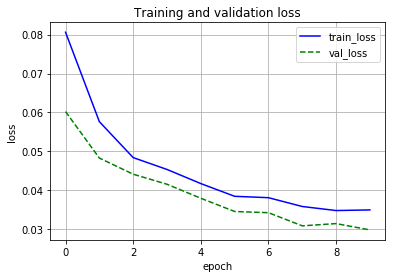

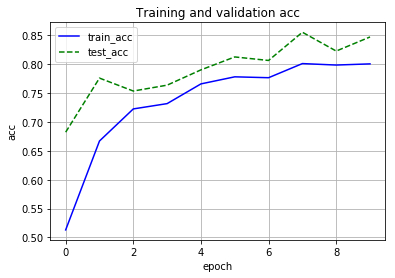

In [22]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='test_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation acc')
plt.grid()

# Confusion Matrix

In [23]:
net = net.eval()

In [58]:
pred = []
Y = []
for i, (x,y) in enumerate(test_loader):
    with torch.no_grad():
        x = x.to(device)
        y = y.to(device)
        output = net(x)
    pred += [int(l.argmax()) for l in output]
    Y += [int(l) for l in y]

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [60]:
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        90
           1       0.70      0.79      0.74        92
           2       0.79      0.85      0.82       105
           3       0.92      0.78      0.84       101
           4       0.77      0.91      0.84        94
           5       0.92      0.85      0.88       132

   micro avg       0.83      0.83      0.83       614
   macro avg       0.84      0.83      0.83       614
weighted avg       0.84      0.83      0.83       614



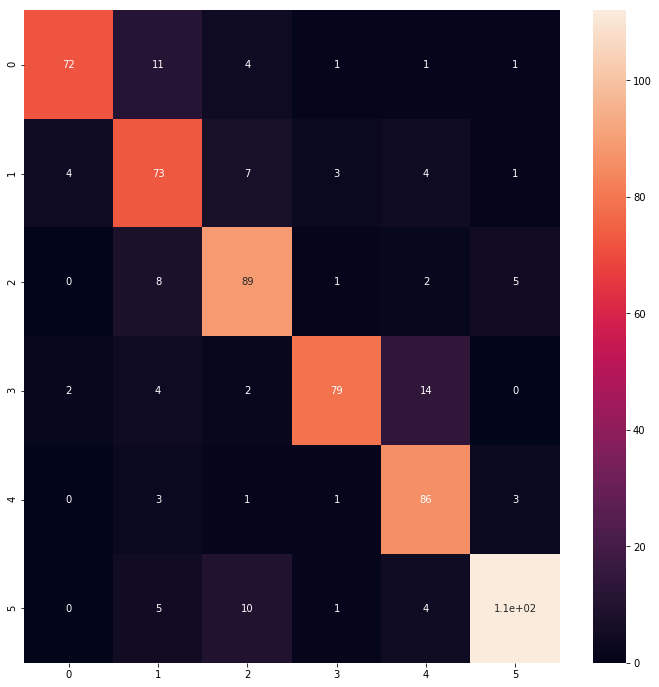

accuracy: 0.8322475570032574


In [61]:
cmx = confusion_matrix(Y, pred)
plt.figure(figsize=(12,12))
sns.heatmap(cmx, annot=True)
plt.show()
print('accuracy: {}'.format(accuracy_score(Y, pred)))

In [32]:
print(cor_table)

                      s_class
labels                       
0             [4gokan_stairs]
1        [5gokan_stairs_east]
2        [5gokan_stairs_west]
3         [8gokan_stairs_cnt]
4        [8gokan_stairs_east]
5       [denkisogokan_stairs]


# Grad-CAMの定義

In [ ]:
class GradCam:
    def __init__(self, model):
        self.model = model.eval()
        self.feature = None
        self.gradient = None
    
    def save_gradient(self, grad):
        self.gradient = grad
    
    def __call__(self, x):
        image_size = (x.size(-1), x.size(-2))
        feature_maps =[]
        
        for i in range(x.size(0)):
            img = x[i].data.cpu().numpy() #GPU上のTensorはcpuに移さないとnumpyに変換できない
            img = img - np.min(img)
            if np.max(img) != 0:
                img = img / np.max(img)
            
            feature = x[i].unsqueeze(0)
            
            for name, module in self.model.named_children():
                if name == 'clasifier':
                    feature = feature.view(feature.size(0), -1)
                feature = module(feature)
                if name == 'features':
                    feature.register_hook(self.save_gradient)
                    self.feature = feature
                    
            classes = F.sigmoid(feature)
            one_hot, _ = classes.max(dim=-1)
            self.model.zero_grad()
            one_hot.backward()
            
            weight = self.gradient.mean(dim=-1, keepdim=True).mean(dim=-2, keepdim=True)
            
            mask = F.relu((weight*self.feature).sum(dim=1)).squeeze(0)
            mask = cv2.resize(mask.data.cpu().numpy(), image_size)
            mask = mask - np.min(mask)
            
            if np.max(mask) != 0:
                mask = mask/np.max(mask)
                
            feature_map = np.float32(cv2.applyColorMap(np.uint8(255*mask), cv2.COLORMAP_JET))
            cam = feature_map + np.float32((np.uint8(img.transpose((1,2,0))*225)))
            cam = cam - np.min(cam)
            
            if np.max(cam) != 0:
                cam = cam/np.max(cam)
                
            feature_maps.append(transforms.ToTensor()(cv2.cvtColor(np.uint8(225*cam), cv2.COLOR_BGR2RGB)))
            
        feature_maps = torch.stack(feature_maps)
        
        return feature_maps
                

In [ ]:
for i in range(len(cam_test_img_path)):
    #入力画像の読み込み
    cam_test_img = Image.open(cam_test_img_path[i])
    cam_img_tensor = (data_transforms['data']((cam_test_img))).unsqueeze(dim=0)
    
    cam_img_tensor = cam_img_tensor.to(device)
    
    img_size = cam_test_img.size
    #grad-camによる予測根拠可視化
    gradcam = GradCam(net)
    
    feature_image = gradcam(cam_img_tensor).squeeze(dim=0)
    feature_image = transforms.ToPILImage()(feature_image)
    
    pred_idx = net(cam_img_tensor).max(1)[1]
                      
    save_dir = '../data/gradcam_img/VGG16/'+s_classlist[i]
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)	# Make a directory
    #保存先ディレクトリ名はその画像のクラス，画像の予測値を画像の名前に書き込む
    cv2.imwrite(save_dir+'/heatmap_pred_'+s_classlist[pred_idx]+'.jpg', superimposed_img)
    print('Saved: ', save_dir+'/heatmap_pred_'+s_classlist[pred_idx]+'.jpg')